# My first applied machine learning notebook. 
We are going to get some data about cars and use it to create and evaluate a predictive model.  Here are the steps will we use:
1. Read in the data from a CSV file
2. Clean the data
3. Create a model and fit it to the data
4. Get performance metrics for the model

### Getting the data:
We need to get the data where we can find it.   Copy automobile_price_data3.csv into the same Getting the data:

* Assignment is not an expression. Nothing is displayed.
* Print will cause something to be displayed.
* The last expression evaluated in a cell will be displayed.

# Read in the data from a CSV file / DataFrame keys displayed

In [8]:
import pandas as pd

# read the CSV file
file_name = 'automobile_price_data3.csv'
data = pd.read_csv(file_name)

# Display the first few rows of the dataframe
data.head()


,normalized-losses,make,fuel,doors,body,drive,weight,engine-size,bhp,mpg,price
0,NaN,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,13495.0
1,NaN,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,16500.0
2,NaN,alfa-romero,unleaded,two,hatchback,rwd,2823,152,154.0,26,16500.0
3,164.0,audi,unleaded,four,saloon,fwd,2337,109,102.0,30,13950.0
4,164.0,audi,unleaded,four,saloon,4wd,2824,136,115.0,22,17450.0


### Clean the data:
Remove columns or rows that have missing data.
Look at the distribution of the data values

In [11]:
import pandas as pd

# read the CSV file
file_name = 'automobile_price_data3.csv'
data = pd.read_csv(file_name)

# Remove rows with missing data
data_cleaned_rows = data.dropna(axis=0)

# Remove columns with missing data
data_cleaned_columns = data_cleaned_rows.dropna(axis=1)

# Display the first few rows of the cleaned dataframe
print("Cleaned Data (First Few Rows):")
print(data_cleaned_columns.head())

# Display the summary statistics of the cleaned dataframe to understand the distribution
print("\nData Distribution:")
print(data_cleaned_columns.describe())


Cleaned Data (First Few Rows):
    normalized-losses  make      fuel doors    body drive  weight  \
3               164.0  audi  unleaded  four  saloon   fwd    2337   
4               164.0  audi  unleaded  four  saloon   4wd    2824   
6               158.0  audi  unleaded  four  saloon   fwd    2844   
8               158.0  audi  unleaded  four  saloon   fwd    3086   
10              192.0   bmw  unleaded   two  saloon   rwd    2395   

    engine-size    bhp  mpg    price  
3           109  102.0   30  13950.0  
4           136  115.0   22  17450.0  
6           136  110.0   25  17710.0  
8           131  140.0   20  23875.0  
10          108  101.0   29  16430.0  

Data Distribution:
       normalized-losses       weight  engine-size         bhp         mpg  \
count         163.000000   163.000000   163.000000  163.000000  163.000000   
mean          121.840491  2459.914110   118.079755   96.171779   31.858896   
std            35.492292   476.085406    30.951571   30.498855    

# Error in accessing removed features

In [9]:
import pandas as pd

# read the CSV file
file_name = 'automobile_price_data3.csv'
data = pd.read_csv(file_name)

# Remove rows with missing data
data_cleaned_rows = data.dropna(axis=0)

# Remove columns with missing data
data_cleaned_columns = data_cleaned_rows.dropna(axis=1)

try:
    # Try to access a removed feature
    print(data_cleaned_columns['1'])
except KeyError as e:
    print(f"KeyError: {e} - The feature has been removed from the DataFrame.")


KeyError: '1' - The feature has been removed from the DataFrame.


# Histograms for features

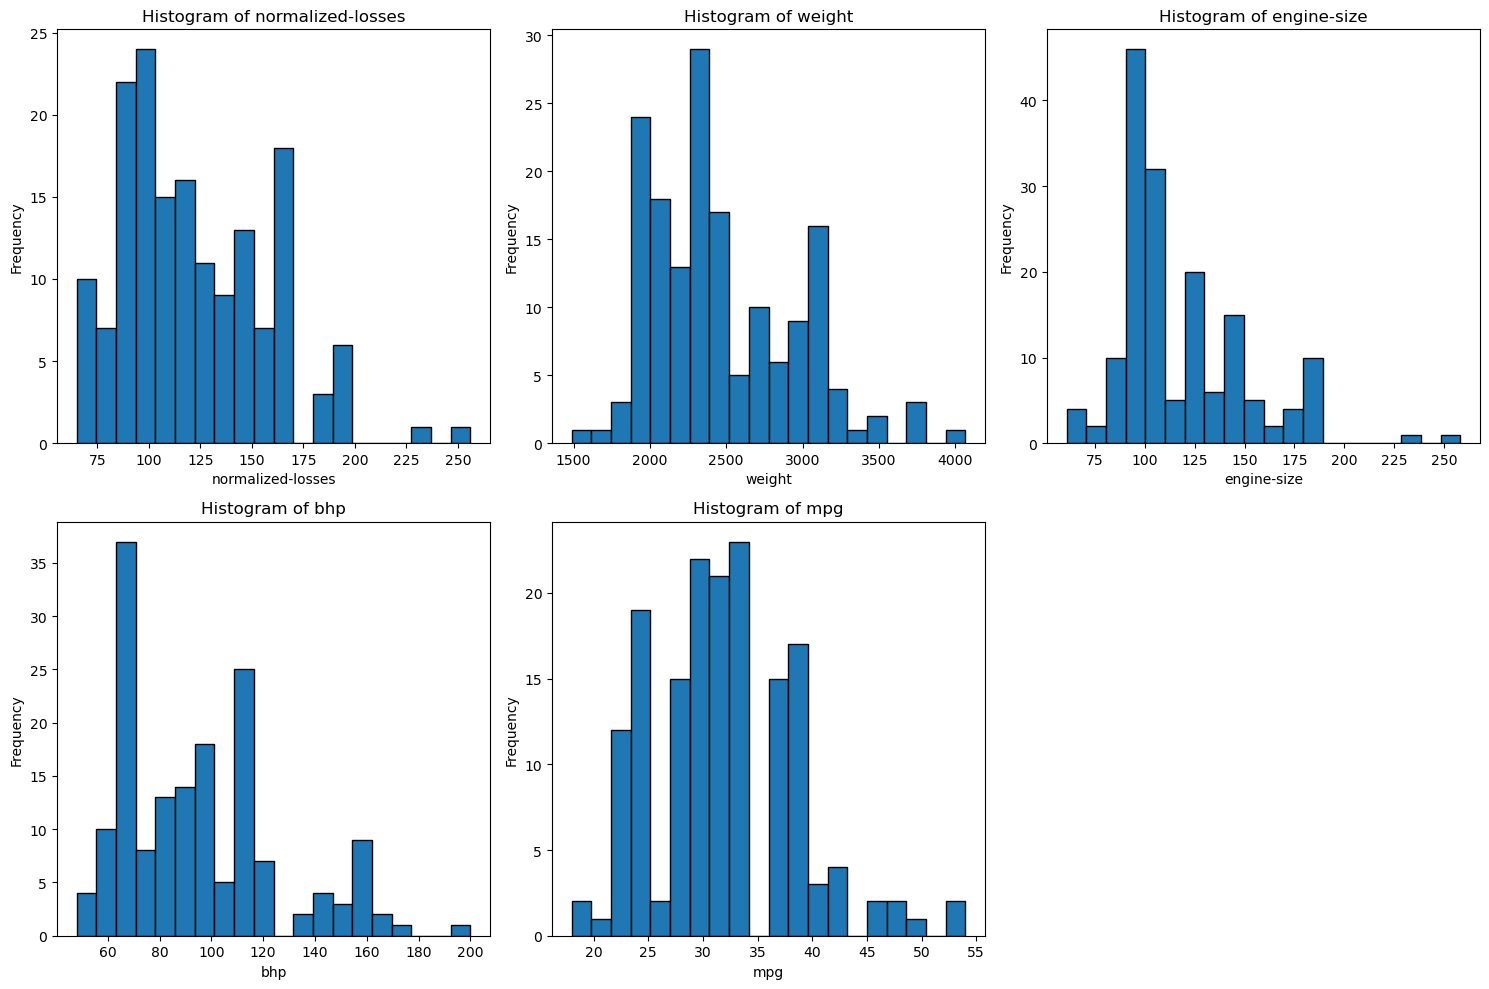

In [11]:
import matplotlib.pyplot as plt

# Features to plot histograms for
features = ['normalized-losses', 'weight', 'engine-size', 'bhp', 'mpg']

# Plot histograms for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(data_cleaned_columns[feature], bins=20, edgecolor='k')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Split the data into a training set and a test set and display the split data 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file
file_name = 'automobile_price_data3.csv'
data = pd.read_csv(file_name)

# Remove rows with missing data
data_cleaned_rows = data.dropna(axis=0)

# Remove columns with missing data
data_cleaned_columns = data_cleaned_rows.dropna(axis=1)

# Define features and target
X = data_cleaned_columns.drop(columns=['price', 'make', 'fuel', 'doors', 'body', 'drive'])
y = data_cleaned_columns['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("split date for X train")
print(X_train)
print("split date for X test")
print(X_test)
print("split date for Y train")
print(y_train)
print("split date for Y test")
print(y_test)



split date for X train
     normalized-losses  weight  engine-size    bhp  mpg
112              161.0    3252          152   95.0   33
6                158.0    2844          136  110.0   25
125              186.0    2778          151  143.0   27
62               115.0    2410          122   84.0   32
59               129.0    2385          122   84.0   32
..                 ...     ...          ...    ...  ...
97               103.0    2037           97   69.0   37
143              102.0    2340          108   94.0   32
24               148.0    1967           90   68.0   38
122              154.0    2191           98   68.0   38
139               83.0    2120          108   73.0   31

[130 rows x 5 columns]
split date for X test
     normalized-losses  weight  engine-size    bhp  mpg
172              134.0    2975          146  116.0   30
152               74.0    2015           92   62.0   38
168              134.0    2536          146  116.0   30
78               161.0    2004     

# Create a model and fit it to the data

Get performance metrics for the model

In [14]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Display the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:\n", coefficients)

# Display the intercept
print("Intercept:", model.intercept_)


Mean Squared Error (MSE): 6911475.075677496
R-squared (R²): 0.7617816892788721
Model Coefficients:
                    Coefficient
normalized-losses    16.073814
weight                7.307158
engine-size          33.122267
bhp                  19.250826
mpg                 -59.657234
Intercept: -12212.97846310657
